In [1]:
from multiprocessing import Pool
import pandas as pd
import numpy as np
from generate_data import simulate_sys
# Load model
import tops.ps_models.k2a as model_data
import tops.dynamic as dps
from set_up_case import create_ps

from sparculing.helper_functions import get_lin_sys

from scipy.signal import decimate

import matplotlib.pyplot as plt

In [3]:
model = model_data.load()

In [4]:
# Case parameters
t_end = 500
dt = 5e-3
load_a = 0.1
# Forced oscillations
fo_a = 0  # 0.005
fo_w = 2 * np.pi * 0.2
    
# Noise
gen_a = 0
# Load
load_t = 1e1
ps = create_ps(model, load_t)
df = simulate_sys(ps, t_end, dt, fo_w, fo_a, load_a, load_t, gen_a)

Model loads: Load was removed.
Model gov: TGOV1 was removed.
0%

/home/sigurd/documents/WADC/validation/DynPSSimPy/user_lib/gov.py:82: RuntimeWarning: invalid value encountered in divide
  self.div = lambda x, v: self.q(x, v) / (


99%

<Axes: >

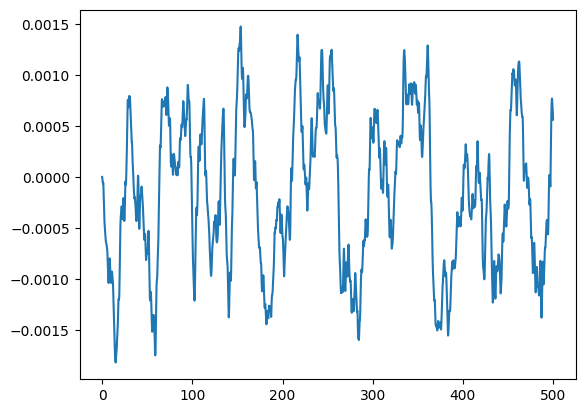

In [5]:
df["G1_w"].plot()

In [6]:
df.columns

Index(['G1_angle', 'G2_angle', 'G3_angle', 'G4_angle', 'G1_w', 'G2_w', 'G3_w',
       'G4_w', 'G1_p', 'G2_p', 'G3_p', 'G4_p', 'B1_f', 'B2_f', 'B3_f', 'B4_f',
       'B5_f', 'B6_f', 'B7_f', 'B8_f', 'B9_f', 'B10_f', 'B11_f', 'G1_f',
       'G2_f', 'G3_f', 'G4_f'],
      dtype='object')

<Axes: >

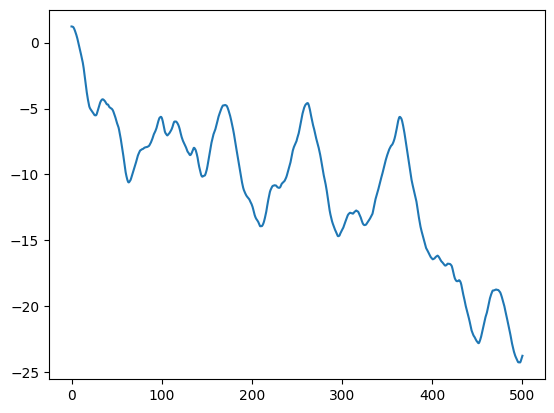

In [7]:
df["G1_angle"].plot()

In [8]:
angles = df[["G1_angle", "G2_angle", "G3_angle", "G4_angle"]].to_numpy()

In [9]:
omegas = df[["G1_w", "G2_w", "G3_w", "G4_w"]].to_numpy()

In [10]:
M = 2*np.array([6.5, 6.5, 6.175, 6.175])
D = np.array([0.01, 0.01, 0.01, 0.01])

In [11]:
CC = np.cov(np.concatenate((np.transpose(angles), np.transpose(omegas))))

In [12]:
Cdd = CC[0:4, 0:4]

In [13]:
Cww = CC[4:8, 4:8]

In [14]:
Cwd = CC[4:8, 0:4]

In [15]:
J = np.diag(M)*Cww*np.linalg.inv(Cdd)-np.diag(D)*Cwd*np.linalg.inv(Cdd)

In [16]:
dP_dd = np.array(Cww)*np.linalg.inv(Cdd)

In [17]:
1/M-1/(2*6.5)

array([0.        , 0.        , 0.00404858, 0.00404858])

In [18]:
A = np.concatenate(
    (
        np.concatenate((np.zeros((4, 4)), np.identity(4)), axis=1),
        np.concatenate((-np.diag(1/M)*J, -np.diag(1/M)*np.diag(D)), axis=1)),axis=0)

In [19]:
lin_A=np.linalg.eig(A)

In [20]:
lin_sys = get_lin_sys(ps)

/home/sigurd/documents/WADC/validation/DynPSSimPy/user_lib/gov.py:82: RuntimeWarning: invalid value encountered in divide
  self.div = lambda x, v: self.q(x, v) / (


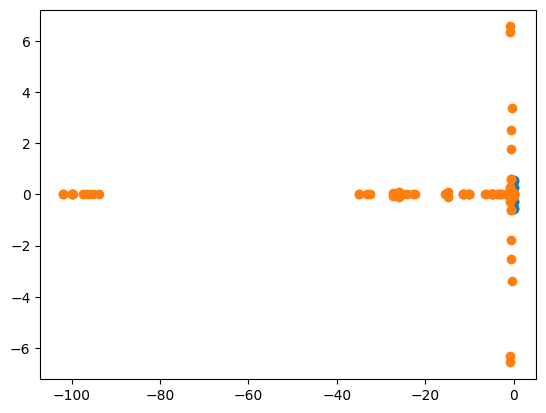

In [21]:
plt.figure()
plt.scatter(lin_A.eigenvalues.real, lin_A.eigenvalues.imag)
plt.scatter(lin_sys.eigs.real, lin_sys.eigs.imag)

In [22]:
np.min(lin_sys.damping)

np.float64(-1.0)

In [23]:
np.min(-lin_A.eigenvalues.real/np.absolute(lin_A.eigenvalues))

np.float64(0.0007121027349880337)

In [24]:
CC= np.cov(np.concatenate((np.transpose(angles), np.transpose(omegas))))

In [25]:
CC[0:4, 4:8]-Cdw

NameError: name 'Cdw' is not defined

In [ ]:
CC[0:4, 0:4]-Cdd

In [ ]:
CC[4:8, 4:8]-Cww

In [ ]:
Cdw=CC[8:, 8:]

In [ ]:
Cdw

In [ ]:
np.sqrt(np.arange(12).reshape(3, 4))

In [ ]:
np.dot(omegas.T - omegas.mean(), omegas - omegas.mean(axis=0)) / (omegas.shape[0]-1)

In [ ]:
Cdw=np.dot(angles.T - angles.mean(), omegas - omegas.mean(axis=0)) / (omegas.shape[0]-1)

In [ ]:
Cdd

In [ ]:
Cww

In [ ]:
Cdw

In [ ]:
J = np.diag(M)*Cww*np.linalg.inv(Cdd)+np.diag(D)*Cdw*np.linalg.inv(Cdd)

In [ ]:
J

In [ ]:
dP_dd

In [ ]:
signals = np.concatenate((np.transpose